In [3]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
Numpy: 1.19.5
Pandas: 1.2.4
Matplotlib: 3.4.2
Scipy: 1.6.3
Sklearn: 0.24.2


In [4]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
# load the dataset using pandas
# download credit card data set from kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud
data = pd.read_csv('creditcard.csv')

In [46]:
# Exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [47]:
print(data.shape)

(284807, 31)


In [48]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [49]:
data= data.sample(frac=1, random_state=1)
print(data.shape)

(284807, 31)


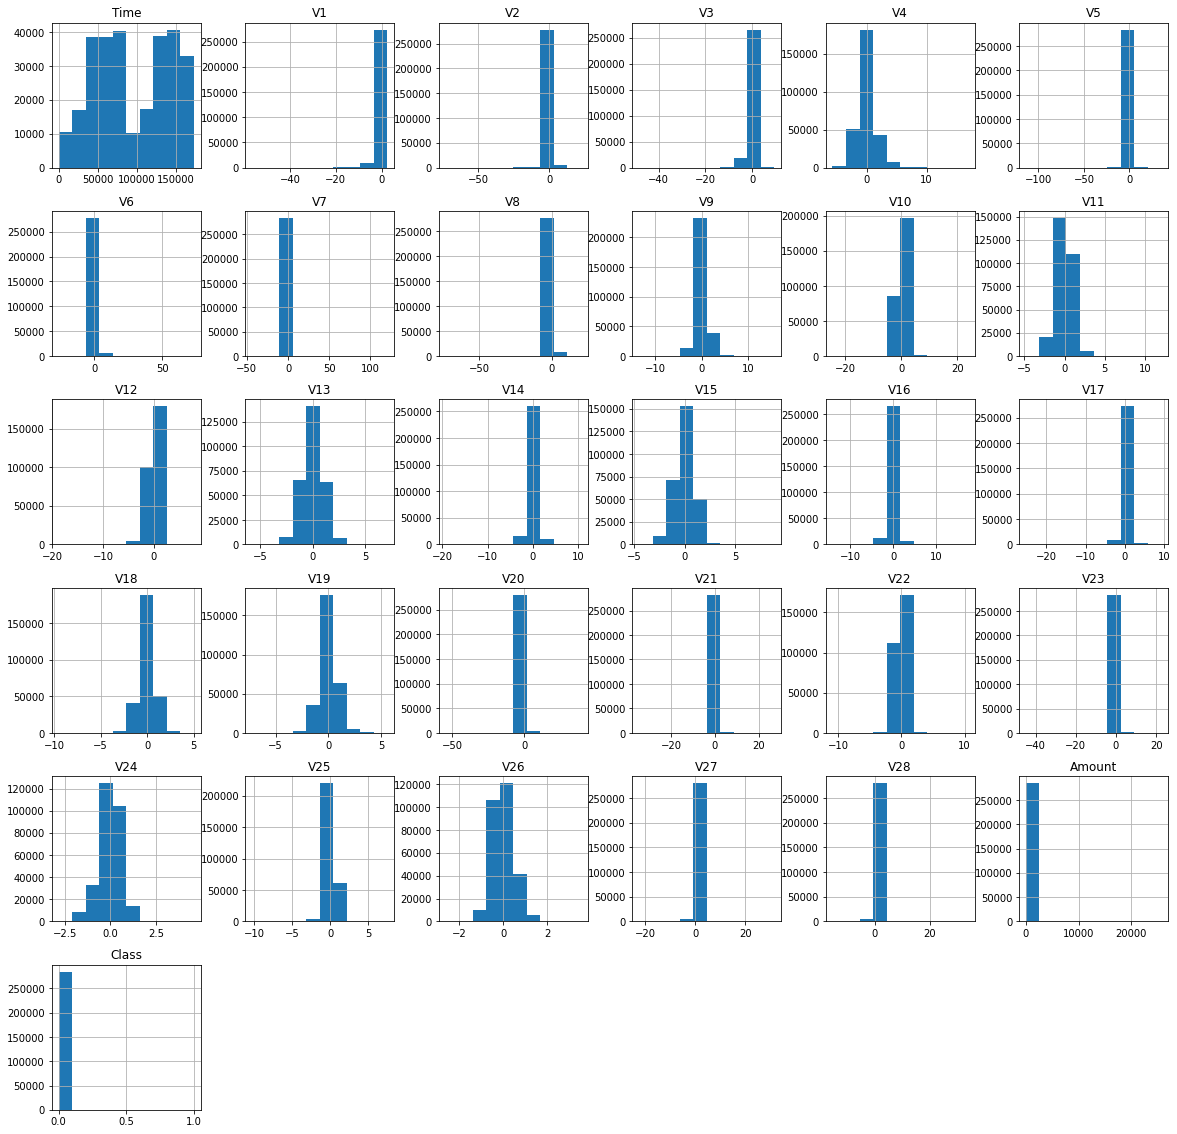

In [50]:
# plot the histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

In [51]:
# determining no of fraid cases in dataset
fraud=data[data['Class']==1]
valid=data[data['Class']==0]

outlier_fraction= len(fraud)/float(len(valid))
print(outlier_fraction)

print('Fraud cases : {}'.format(len(fraud)))
print('Valid cases : {}'.format(len(valid)))

0.0017304750013189597
Fraud cases : 492
Valid cases : 284315


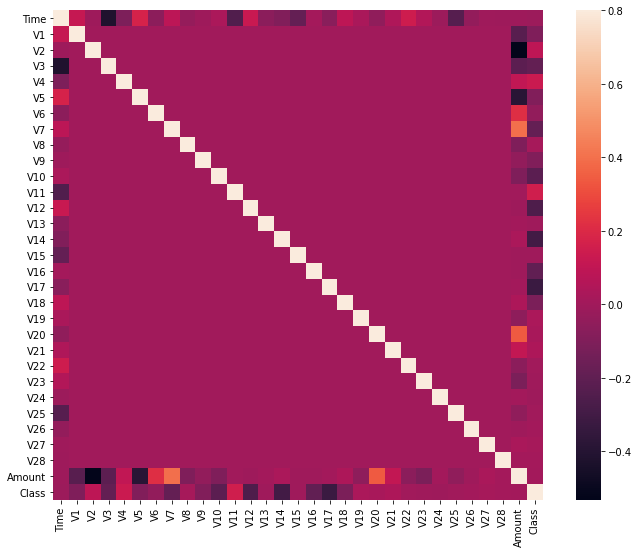

In [52]:
# correlation matrix
corrmat= data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [53]:
# get all the columns from the dataframe
columns = data.columns.tolist()

# filter the columns to remove the data we dont want
columns = [c for c in columns if c not in ["Class"]]

# store the variable we will be predicting
target="Class"

X=data[columns]
Y=data[target]

# print the shapes
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [54]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define a random state
state=1

#define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X), contamination=outlier_fraction, random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,novelty=False, contamination=outlier_fraction)
}

In [55]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 647
0.9977282861727416
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807



KeyboardInterrupt: 

<Figure size 648x504 with 0 Axes>